In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Графіки за даними "Населення_України: Народжуваність"

In [2]:
response = requests.get(
    "https://uk.wikipedia.org/wiki/Населення_України#Народжуваність"
)
data = pd.read_html(response.text)

birth_rate_table = data[10]
birth_rate_table.replace('—', np.nan, inplace=True)
birth_rate_table['2014'] = birth_rate_table['2014'].apply(pd.to_numeric)
birth_rate_table['2019'] = birth_rate_table['2019'].apply(pd.to_numeric)
birth_rate_table = birth_rate_table.fillna({
    '1950': birth_rate_table['1950'].mean(),
    '1960': birth_rate_table['1960'].mean(),
    '1970': birth_rate_table['1970'].mean(),
    '1990': birth_rate_table['1990'].mean(),
    '2000': birth_rate_table['2000'].mean(),
    '2012': birth_rate_table['2012'].mean(),
    '2014': birth_rate_table['2014'].mean(),
    '2019': birth_rate_table['2019'].mean()})
birth_rate_table_regions = birth_rate_table.drop([27])

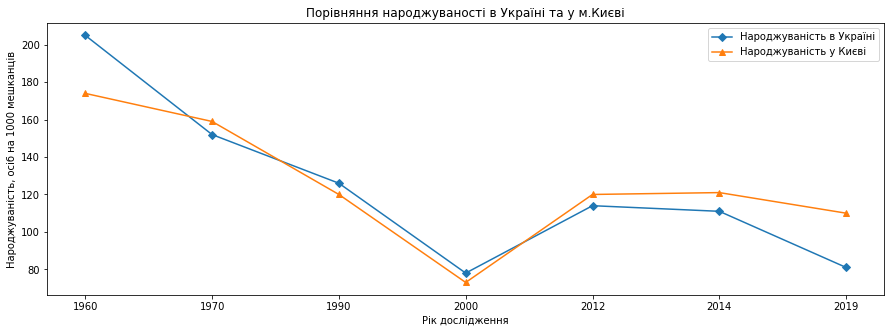

In [3]:
fig, axs = plt.subplots(figsize=(15,5))
axs.plot(birth_rate_table.iloc[27][2:], label='Народжуваність в Україні', marker="D")
axs.plot(birth_rate_table.iloc[25][2:], label='Народжуваність у Києві', marker="^")
plt.xlabel('Рік дослідження')
plt.ylabel('Народжуваність, осіб на 1000 мешканців')
plt.title('Порівняння народжуваності в Україні та у м.Києві')
plt.legend()
plt.show()

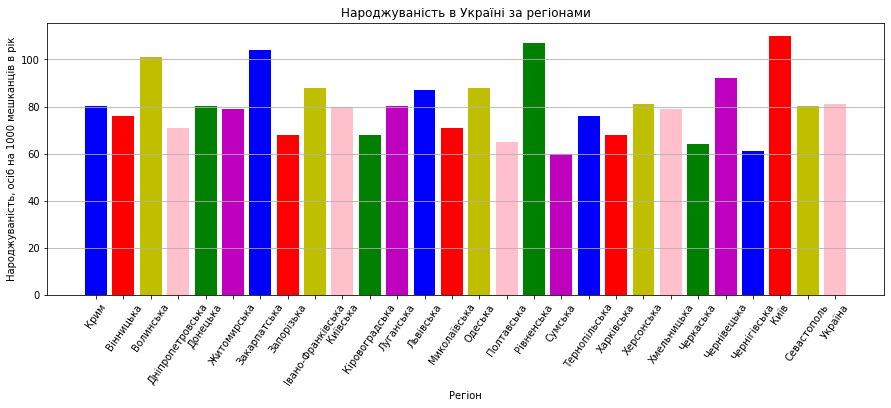

In [4]:
fig, axs = plt.subplots(figsize=(15,5))
axs.bar(birth_rate_table['Регіон'], birth_rate_table['2019'], color=["b", "r", "y", "pink", "g", "m"])
plt.xlabel('Регіон')
plt.ylabel('Народжуваність, осіб на 1000 мешканців в рік')
plt.title('Народжуваність в Україні за регіонами')
for tick in axs.get_xticklabels():
            tick.set_rotation(55)
plt.grid(axis='y')
plt.show()

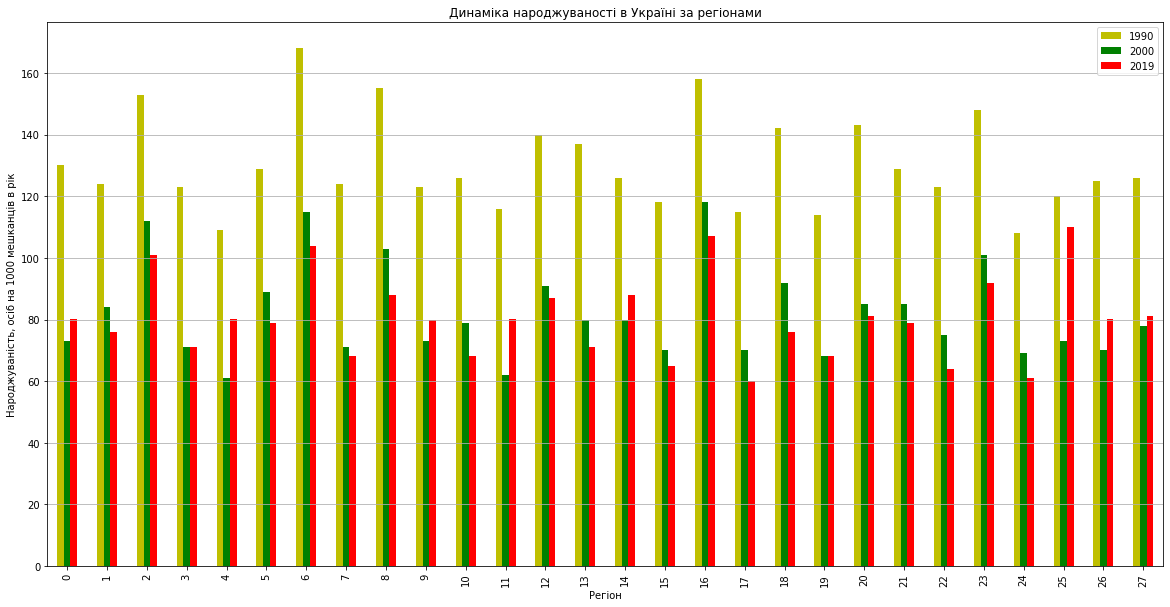

In [5]:
birth_rate_table[['Регіон', '1990', '2000', '2019']].plot.bar(color=["y", "g", "r"], figsize=(20,10))
plt.grid(axis='y')
plt.title('Динаміка народжуваності в Україні за регіонами')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність, осіб на 1000 мешканців в рік')
plt.show()

### Графіки за даними "ІТ спільнота"

In [6]:
data = pd.read_csv("2017_jun_final.csv")
python_data = data[data['Язык.программирования'] == 'Python']
salary_data = python_data[["Должность", "Зарплата.в.месяц"]]
salary_group = salary_data.groupby("Должность").agg(['min', 'max', 'sum'])

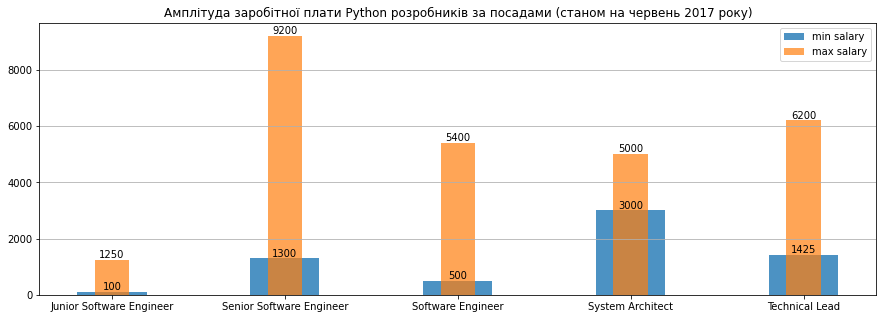

In [7]:
fig, axs = plt.subplots(figsize=(15,5))
p1 = axs.bar(salary_group['Зарплата.в.месяц'].index, salary_group['Зарплата.в.месяц']['min'], width = 0.4, label="min salary", alpha=0.8)
p2 = axs.bar(salary_group['Зарплата.в.месяц'].index, salary_group['Зарплата.в.месяц']['max'], width = 0.2, label="max salary", alpha=0.7)
plt.grid(axis='y')
axs.bar_label(p1)
axs.bar_label(p2)
plt.title('Амплітуда заробітної плати Python розробників за посадами (станом на червень 2017 року)')
axs.legend()
plt.show()

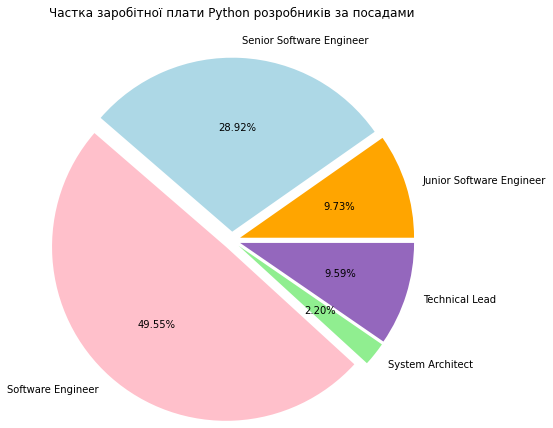

In [8]:
plt.pie(
    salary_group['Зарплата.в.месяц']['sum'],
    labels=salary_group['Зарплата.в.месяц'].index,
    radius=2,    
    explode=[0.1,0.1,0.1,0.1,0.1],
    autopct="%.2f%%",
    pctdistance=0.6,
    colors=["orange", "lightblue", "pink", "lightgreen", "#9467bd"],
    )
plt.title('Частка заробітної плати Python розробників за посадами', y=1.5)
plt.show()

In [48]:
salary_index_data = python_data[["Изменение.зарплаты.за.12.месяцев", "Город"]]
salary_index_group = salary_index_data.groupby("Город").agg(['min', 'max'])

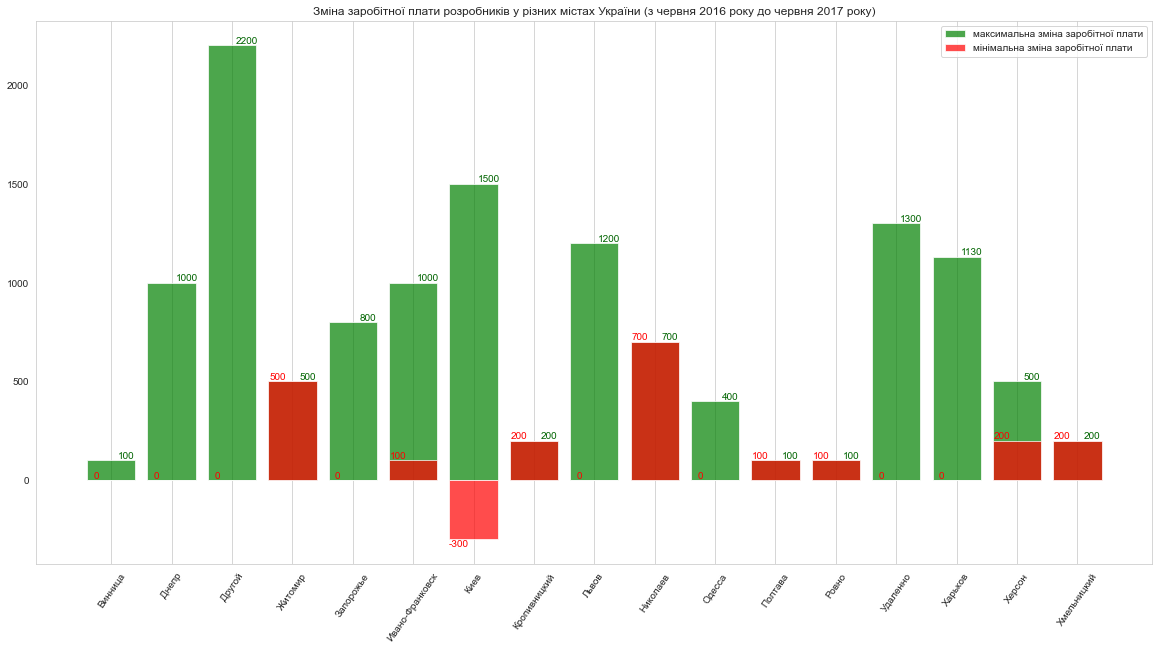

In [18]:
fig, axs = plt.subplots(figsize=(20,10))

p2 = axs.bar(salary_index_group["Изменение.зарплаты.за.12.месяцев"].index,
             salary_index_group["Изменение.зарплаты.за.12.месяцев"]['max'],
             width = 0.8,
             label="максимальна зміна заробітної плати",
             color='g',
             alpha=0.7)
p1 = axs.bar(salary_index_group["Изменение.зарплаты.за.12.месяцев"].index,
             salary_index_group["Изменение.зарплаты.за.12.месяцев"]['min'],
             width = 0.8,
             label="мінімальна зміна заробітної плати",
             color='r',
             alpha=0.7)
plt.grid(axis='y')
axs.bar_label(p1, color='r', position=[-15,0])
axs.bar_label(p2, color='darkgreen', position=[15,0])
for tick in axs.get_xticklabels():
            tick.set_rotation(55)
plt.title('Зміна заробітної плати розробників у різних містах України (з червня 2016 року до червня 2017 року)')
axs.legend()
plt.show()

### Графіки за даними датасета з Kaggle.com (використовуючи seaborn)

In [4]:
import seaborn as sns
sns.set_style("whitegrid")

In [6]:
data = pd.read_csv("bestsellers with categories.csv")
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(data.head(10))

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   
5      A Dance with Dragons (A Song of Ice and Fire)   
6  A Game of Thrones / A Clash of Kings / A Storm...   
7                     A Gentleman in Moscow: A Novel   
8      A Higher Loyalty: Truth, Lies, and Leadership   
9                          A Man Called Ove: A Novel   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fic

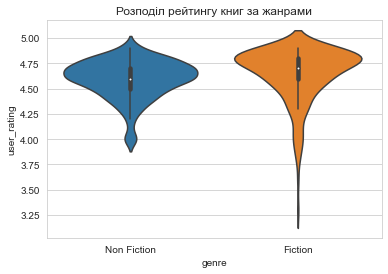

In [9]:
sns.violinplot(data=data, x='genre', y='user_rating')
plt.title('Розподіл рейтингу книг за жанрами')
plt.show()

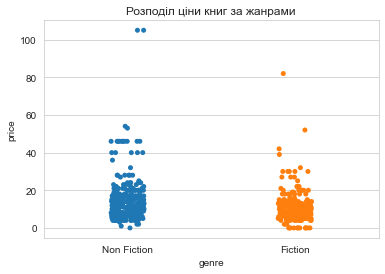

In [11]:
sns.stripplot(data=data, x='genre', y='price')
plt.title('Розподіл ціни книг за жанрами')
plt.show()

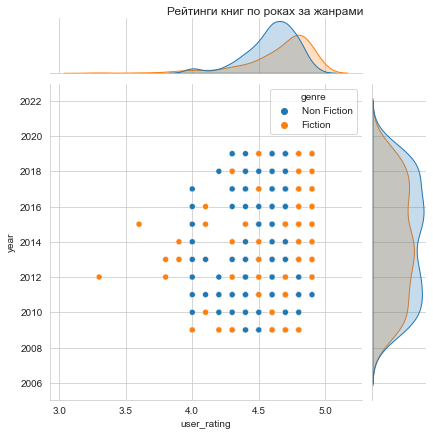

In [20]:
sns.jointplot(data=data, x='user_rating', y='year', hue='genre')
plt.title('Рейтинги книг по роках за жанрами', y=1.2, x=-2)
plt.show()

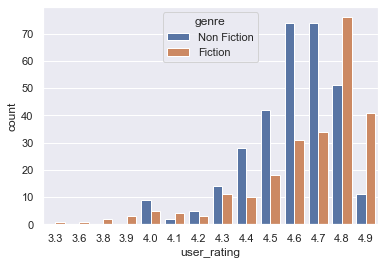

In [40]:
sns.countplot(data=data, x='user_rating', hue='genre')
plt.title('Розподіл рейтингу книг за жанрами')
plt.show()

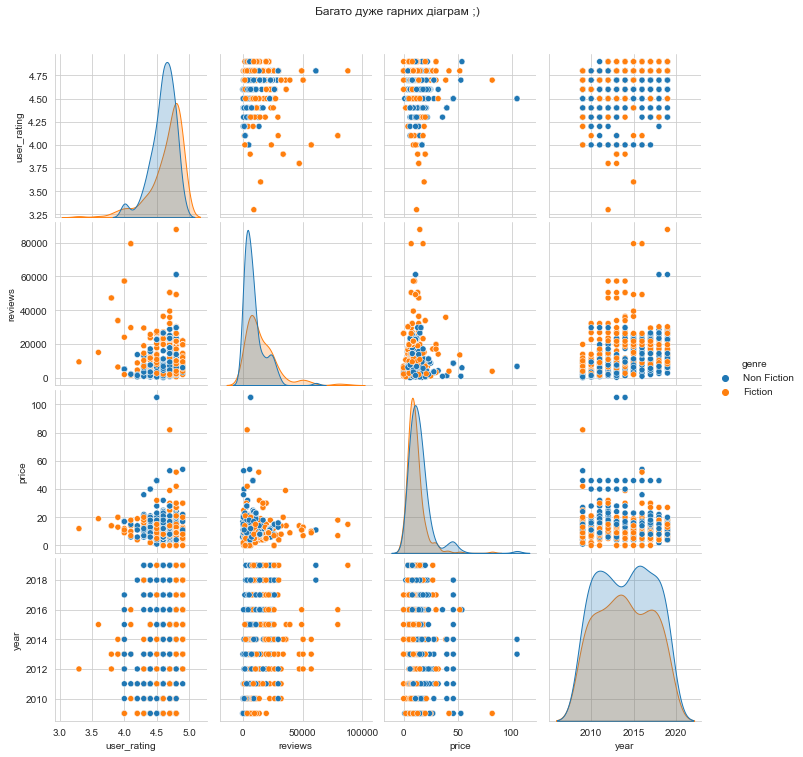

In [26]:
sns.color_palette("tab10")
sns.pairplot(data=data, hue='genre')
plt.title('Багато дуже гарних діаграм ;)', y=4.3, x=-1)
plt.show()